# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import json

import nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

from gensim.models.doc2vec import TaggedDocument
from gensim.models.doc2vec import Doc2Vec
from gensim.models import Word2Vec

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from tqdm import tqdm
from wordcloud import WordCloud

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

In [2]:
import nltk
from nltk.corpus import stopwords

In [3]:
import spacy
# nlp = spacy.load("en_core_web_sm")

In [66]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import nltk

In [5]:
from nltk.stem import SnowballStemmer

# Example usage of SnowballStemmer
stemmer = SnowballStemmer(language='english')

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
# nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Data Preprocessing

In [382]:
df = pd.read_csv('./all_data.csv', index_col=0)

In [383]:
df = df[~df.duplicated()]

In [384]:
df.isna().sum()

Number_of_review        0
Hotel_location          0
Hotel_number          164
Hotel_URL               0
Hotel_rating            0
CurrentReviewPage       0
Current_page_URL        0
User                    0
Review                  0
User_Address         2530
Title                   2
Date_of_stay            0
Rating                  0
Raw_Rating              0
Unnamed: 15          5068
dtype: int64

In [385]:
df.shape

(5072, 15)

Text(0.5, 0, 'Rating')

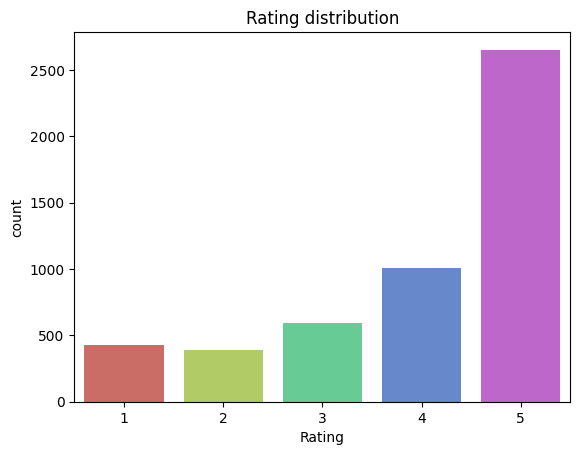

In [386]:
sns.countplot(data=df, x='Raw_Rating', palette='hls').set_title('Rating distribution')
plt.xlabel('Rating')

In [387]:
df['chars'] = df['Review'].apply(lambda x: len(x))
df['words'] = df['Review'].apply(lambda x: len(x.split(' ')))

In [388]:
df.chars.max()

14892

AttributeError: 'DataFrame' object has no attribute 'iteritems'

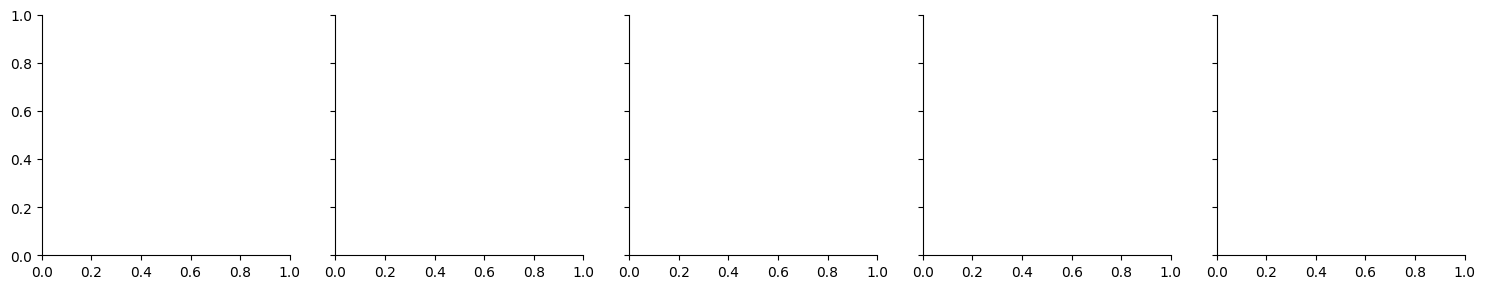

In [389]:
g = sns.FacetGrid(data=df, col='Raw_Rating')
g.map(plt.hist, 'chars', color='#1D3557')

In [54]:
# sns.stripplot(data=df, x='Review', y='Raw_Rating', palette='mako', alpha=0.3)

# Vader algoritm

In [7]:
df = pd.read_csv('./cleaned_df.csv')

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
vader = df.copy()

In [10]:
tqdm.pandas()

In [25]:
vader['sentiments'] = vader['Review'].astype(str).progress_apply(lambda x: sid.polarity_scores(x))

100%|██████████| 5213/5213 [00:07<00:00, 730.40it/s] 


In [26]:
sentiment = pd.concat([vader.drop(['sentiments'], axis=1), vader['sentiments'].apply(pd.Series)], axis=1)

In [27]:
def add_review_label(data):
    if data > 0.1:
        return  "positive"
    elif data < -0.1:
        return "negative"
    else:
        return "neutral"

In [28]:
sentiment['predicted_sentiment'] = sentiment['compound'].apply(lambda x: add_review_label(x))

In [29]:
sentiment['predicted_sentiment'].value_counts()

predicted_sentiment
positive    4587
negative     572
neutral       54
Name: count, dtype: int64

In [30]:
vader2 = sentiment.copy()

In [31]:
vader2['true_sentiment'] = vader2['Raw_Rating'].map({1: 'negative',
                                                2: 'negative',
                                                3: 'neutral',
                                                4: 'positive',
                                                5: 'positive'})

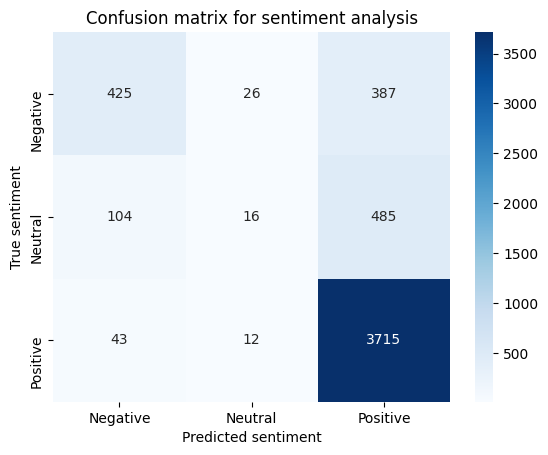

In [32]:
cm = confusion_matrix(vader2['true_sentiment'], vader2['predicted_sentiment'])

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

In [24]:
print("\nClassification report:\n", classification_report(vader2['true_sentiment'],
                                                          vader2['predicted_sentiment']))


Classification report:
               precision    recall  f1-score   support

    negative       0.80      0.42      0.55       838
     neutral       0.21      0.02      0.04       605
    positive       0.79      0.99      0.88      3770

    accuracy                           0.79      5213
   macro avg       0.60      0.48      0.49      5213
weighted avg       0.73      0.79      0.73      5213



In [33]:
print("\nClassification report:\n", classification_report(vader2['true_sentiment'],
                                                          vader2['predicted_sentiment']))


Classification report:
               precision    recall  f1-score   support

    negative       0.74      0.51      0.60       838
     neutral       0.30      0.03      0.05       605
    positive       0.81      0.99      0.89      3770

    accuracy                           0.80      5213
   macro avg       0.62      0.51      0.51      5213
weighted avg       0.74      0.80      0.75      5213



In [ ]:
# accuracy is 80%

####

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
}

In [ ]:
df = pd.read_csv('./all_data.csv')

In [ ]:
df = df[~df.duplicated()]

In [ ]:
df.shape

In [ ]:
df.info().

In [ ]:
df['chars'] = df['Review'].apply(lambda x: len(x))
df['words'] = df['Review'].apply(lambda x: len(x.split(' ')))

In [ ]:
df["Cleaned_Review"] = df["Review"].str.lower()

In [ ]:
df['Cleaned_Review'] = df['Cleaned_Review'].str.replace('’', "'")

In [ ]:
#Expand contractions
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
#     expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [ ]:
tqdm.pandas()

In [ ]:
df["Cleaned_Review"] = df["Cleaned_Review"].progress_apply(lambda text: expand_contractions(text))

100%|██████████| 5073/5073 [00:07<00:00, 683.87it/s]


In [ ]:
#Replace emojis
def replace_emojis(text):
    # Define a regex pattern to find emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emojis
                               u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
                               u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)

    # Replace emojis with text representation
    text_with_replaced_emojis = emoji_pattern.sub(lambda x: ' ' + emoji.demojize(x.group()) + ' ', text)

    return text_with_replaced_emojis

In [ ]:
df["Cleaned_Review"] = df["Cleaned_Review"].progress_apply(lambda text: replace_emojis(text))

100%|██████████| 5073/5073 [00:00<00:00, 33588.60it/s]


In [ ]:
def load_stopwords(file_path):
    with open(stopwords_file, 'r') as file:
        lines = file.readlines()

        words = []
        for line in lines:
            words.extend(line.strip().split(','))

#         stopwords_list = [line.strip() for line in file if not line.strip().endswith('ot')]
    return words

In [ ]:
stopwords_file = './gist_stopwords.txt'
stopwords_list = load_stopwords(stopwords_file)

In [ ]:
## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    PUNCT_TO_REMOVE = ''.join([char for char in string.punctuation])
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["Cleaned_Review"] = df["Cleaned_Review"].progress_apply(lambda text: remove_punctuation(text))

100%|██████████| 5073/5073 [00:00<00:00, 40495.48it/s]


In [ ]:
## Removal of Stopwords
def remove_stopwords(text, stopwords_list):
    tokens_without_stopwords = [word for word in text.split() if word.lower() not in stopwords_list]
    return ' '.join(tokens_without_stopwords)

df["Cleaned_Review"] = df["Cleaned_Review"].apply(lambda text: remove_stopwords(text, stopwords_list))

In [ ]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["Cleaned_Review"] = df["Cleaned_Review"].apply(lambda text: remove_urls(text))

In [ ]:
import re

def remove_special_characters(text):
    # Define a pattern to match special characters
    special_char_pattern = r'[^a-zA-Z0-9\s]'  # This pattern will keep only alphanumeric characters and whitespaces

    # Remove special characters using the pattern
    text_without_special_chars = re.sub(special_char_pattern, '', text)

    return text_without_special_chars

df["Cleaned_Review"] = df["Cleaned_Review"].apply(lambda text: remove_special_characters(text))

In [ ]:
## Removal of words with numbers
def remove_words_with_numbers(text):
    text = [word for word in text if not any(c.isdigit() for c in word)]
    return(''.join(text))

df["Cleaned_Review"] = df["Cleaned_Review"].apply(lambda text: remove_words_with_numbers(text))

In [ ]:
# # Stemming
# def stem_text(text):
#     sentence = []
#     for word in text.split():
#         stemmer = SnowballStemmer('english')
#         sentence.append(stemmer.stem(word))
#     return ' '.join(sentence)

# df["Cleaned_Review"] = df["Cleaned_Review"].progress_apply(lambda text: stem_text(text))

In [ ]:
# ## Lematize text
# def lemmatize_text(text):
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_text = [lemmatizer.lemmatize(word, 'v') for word in text.split()]

#     return ' '.join(lemmatized_text)

# df["Cleaned_Review"] = df["Cleaned_Review"].progress_apply(lambda text: lemmatize_text(text))

#Lemmatization
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('V'):
        return 'v'  # Verb
    elif tag.startswith('N'):
        return 'n'  # Noun
    elif tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return 'n'  # Default to Noun

def stem_and_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    processed_tokens = []
    for token, tag in pos_tags:
        if tag.startswith('N'):  # Stem only nouns
            stemmed_token = stemmer.stem(token)
            processed_tokens.append(stemmed_token)
        else:
            lemmatized_token = lemmatizer.lemmatize(token, pos=get_wordnet_pos(tag))
            processed_tokens.append(lemmatized_token)

    return ' '.join(processed_tokens)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    return ' '.join(lemmatized_text)

df["Cleaned_Review"] = df["Cleaned_Review"].progress_apply(lambda text: lemmatize_text(text))

100%|██████████| 5073/5073 [00:22<00:00, 229.41it/s]


In [ ]:
df['Cleaned_Review'].iloc[273]

'hotel great locate slope ski close bar restaurant room perfect spacious staff helpful breakfast dinner offer great selection food beautiful chill reception area foyer log whilst watch people slope perfect sit people watch hotel offer ski equipment storage pool spa nonskiers thumbsup'

In [ ]:
df['Review'].iloc[0]

'Really enjoyed the spa facilities and the massage by Evelina. Would recommend to book massage with her, also the guy in the spa reception was very helpful and informative about the massage selection and what would suit me better!!! Thank you for this experience'

In [ ]:
df.head()

,HotelName,Number_of_review,Hotel_location,Hotel_number,Hotel_URL,Hotel_rating,CurrentReviewPage,Current_page_URL,User,Review,User_Address,Title,Date_of_stay,Rating,Raw_Rating,Unnamed: 15,chars,words,Cleaned_Review
0,Premier Luxury Mountain Resort,1506,"11, Karamanitza Str., Bansko 2770 Bulgaria",2770,https://www.tripadvisor.com/Hotel_Review-g3188...,4.5,4,https://www.tripadvisor.com/Hotel_Review-g3188...,Atinaudkm,Really enjoyed the spa facilities and the mass...,NaN,Spa & massage,3/31/2023,5,5,NaN,261,44,enjoy spa facility massage evelina recommend b...
1,Premier Luxury Mountain Resort,1506,"11, Karamanitza Str., Bansko 2770 Bulgaria",2770,https://www.tripadvisor.com/Hotel_Review-g3188...,4.5,4,https://www.tripadvisor.com/Hotel_Review-g3188...,stokeyboy,"A lovely hotel with great facilities, situated...","Stoke-on-Trent, United Kingdom","Quiet, quality and with great staff",3/31/2023,5,5,NaN,502,88,lovely hotel great facility situate quiet loca...
2,Premier Luxury Mountain Resort,1506,"11, Karamanitza Str., Bansko 2770 Bulgaria",2770,https://www.tripadvisor.com/Hotel_Review-g3188...,4.5,4,https://www.tripadvisor.com/Hotel_Review-g3188...,xristos m,After snowboarding for a couple of days I felt...,"Szentgotthard, Hungary",What a gem!,3/31/2023,5,5,NaN,210,38,snowboard couple day felt treat myselfso ask f...
3,Premier Luxury Mountain Resort,1506,"11, Karamanitza Str., Bansko 2770 Bulgaria",2770,https://www.tripadvisor.com/Hotel_Review-g3188...,4.5,4,https://www.tripadvisor.com/Hotel_Review-g3188...,Faz,Exactly what we needed for a group of 8 friend...,"London, United Kingdom",Perfect for ski holiday,2/28/2023,5,5,NaN,528,99,need group friends ski free shuttle service go...
4,Premier Luxury Mountain Resort,1506,"11, Karamanitza Str., Bansko 2770 Bulgaria",2770,https://www.tripadvisor.com/Hotel_Review-g3188...,4.5,4,https://www.tripadvisor.com/Hotel_Review-g3188...,Spoons82,Staff very friendly food good also. Rooms a bi...,"Dublin, Ireland",Nice hotel but too warm and rooms could do wit...,2/28/2023,4,4,NaN,319,59,staff friendly food good room bite plain dated...


In [128]:
length = df['chars'].sum()
df['length'] = df['Cleaned_Review'].apply(len)
new_length = df['length'].sum()
print('Total symbols before cleaning: {}'.format(length))
print('Total symbols after cleaning: {}'.format(new_length))
print('')

df['words_new'] = df['Cleaned_Review'].apply(lambda x: len(x.split(' ')))
print('Total words before cleaning: {}'.format(df['words'].sum()))
print('Total words after cleaning: {}'.format(df['words_new'].sum()))

Total symbols before cleaning: 4738237
Total symbols after cleaning: 2250727

Total words before cleaning: 872195
Total words after cleaning: 340232


In [ ]:
from PIL import features
print(features.check('freetype2'))

True


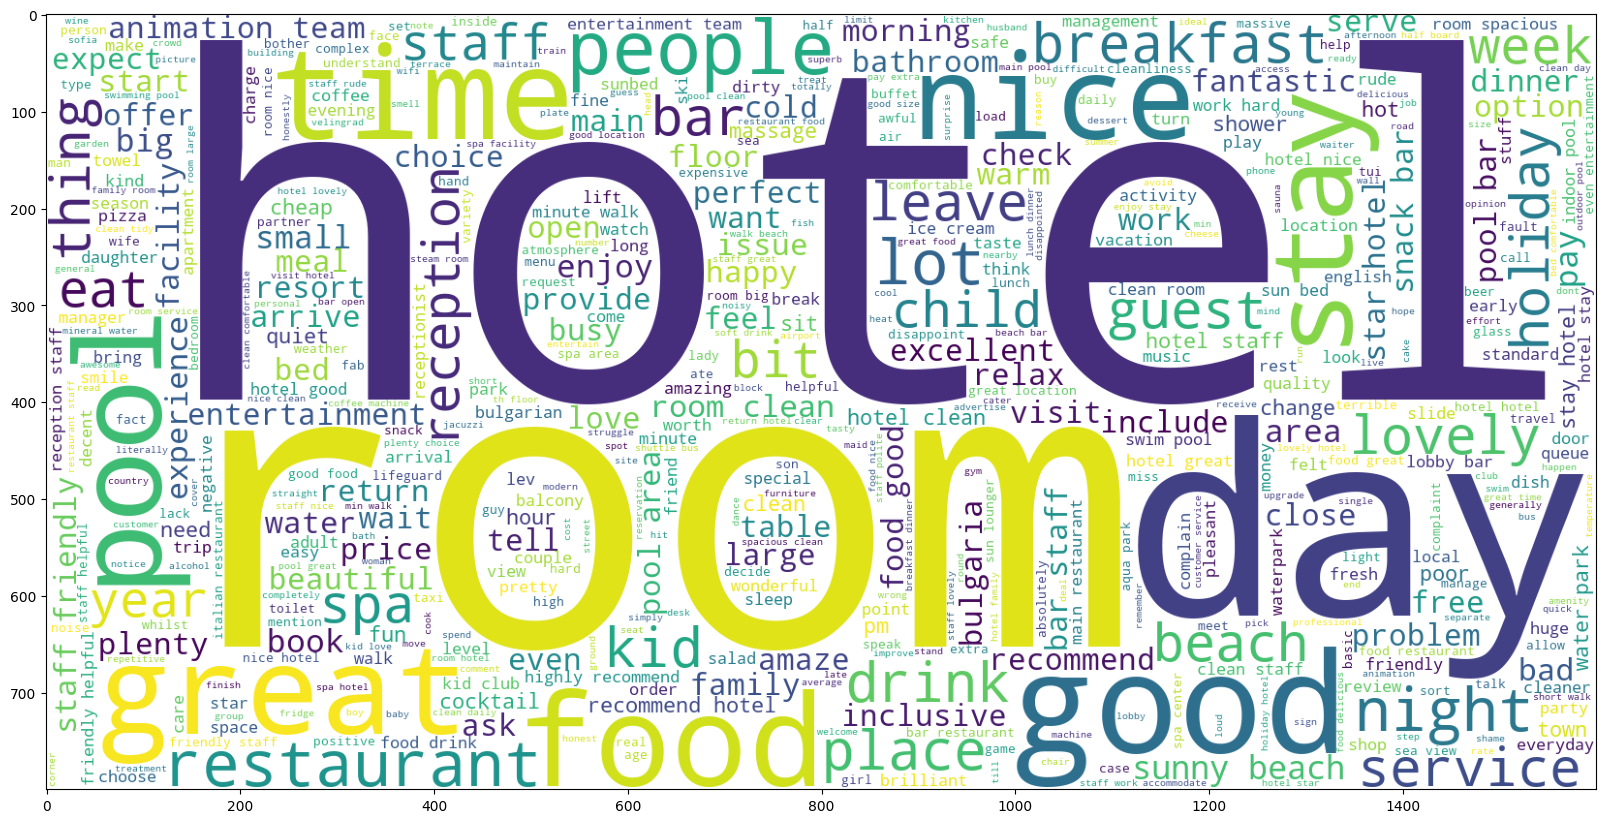

In [129]:
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['Cleaned_Review']))

plt.imshow(wc)

In [131]:
df.to_csv('./cleaned_df_new.csv')

# Feature engineering

In [223]:
data = pd.read_csv('./cleaned_df_new.csv', index_col=0)

In [224]:
data.dtypes

HotelName             object
Number_of_review      object
Hotel_location        object
Hotel_number          object
Hotel_URL             object
Hotel_rating          object
CurrentReviewPage      int64
Current_page_URL      object
User                  object
Review                object
User_Address          object
Title                 object
Date_of_stay          object
Rating                object
Raw_Rating             int64
Unnamed: 15          float64
chars                  int64
words                  int64
Cleaned_Review        object
words_new              int64
length                 int64
dtype: object

In [225]:
data['Cleaned_Review'].head()

0    enjoy spa facility massage evelina recommend b...
1    lovely hotel great facility situate quiet loca...
2    snowboard couple day felt treat myselfso ask f...
3    need group friends ski free shuttle service go...
4    staff friendly food good room bite plain dated...
Name: Cleaned_Review, dtype: object

In [226]:
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [227]:
data['Raw_Rating'] = data['Raw_Rating'].apply(rating)

In [228]:
data['Raw_Rating'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [229]:
data = data.dropna(subset=['Cleaned_Review'])

In [230]:
data = data.drop(columns=['HotelName', 'Number_of_review', 'Hotel_location', 'Hotel_number', 'Hotel_URL',
                  'CurrentReviewPage', 'Current_page_URL', 'Date_of_stay', 'Rating', 'User', 'Review',
                  'User_Address', 'Title', 'Unnamed: 15', 'chars', 'words', 'words_new'])

In [231]:
data = data[~data['Hotel_rating'].isin([ 'https://www.tripadvisor.com/Hotel_Review-g318870-d1449445-Reviews-Pirin_River_Ski_Fun_Family-Bansko_Blagoevgrad_Province.html',
       'https://www.tripadvisor.com/Hotel_Review-g658263-d1942353-Reviews-The_Balkan_Jewel_Resort_Trademark_Collection_by_Wyndham-Razlog_Blagoevgrad_Province.html',
       'https://www.tripadvisor.com/Hotel_Review-g295391-d506569-Reviews-Hotel_Imperial_Plovdiv_a_member_of_Radisson_Individuals-Plovdiv_Plovdiv_Province.html'])]

In [232]:
data.shape

(5067, 4)

In [233]:
data['Review_Length'] = data['Cleaned_Review'].apply(lambda x: len(str(x)))
data['Words'] = data['Cleaned_Review'].apply(lambda x: len(x.split(' ')))

In [234]:
sid = SentimentIntensityAnalyzer()

In [235]:
tqdm.pandas()

In [236]:
data["sentiments"] = data["Cleaned_Review"].progress_apply(lambda x: sid.polarity_scores(x))

100%|██████████| 5067/5067 [00:03<00:00, 1477.83it/s]


In [237]:
# add sentiment analysis columns
data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

In [238]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data["Cleaned_Review"].apply(lambda x: x.split(" ")))]

In [239]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [240]:
# transform each document into a vector data
doc2vec_df = data["Cleaned_Review"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)

In [241]:
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]

In [242]:
data = pd.concat([data, doc2vec_df], axis=1)

In [243]:
tfidf = TfidfVectorizer(max_features=10, stop_words='english')

In [244]:
tfidf_result = tfidf.fit_transform(data['Cleaned_Review']).toarray()

In [245]:
tfidf.get_feature_names_out()

array(['bar', 'clean', 'day', 'food', 'good', 'great', 'hotel', 'pool',
       'room', 'staff'], dtype=object)

In [246]:
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names_out(), index=data.index)

In [247]:
data = pd.concat([data, tfidf_df], axis=1)

In [248]:
data.reset_index(drop=True, inplace=True)

In [249]:
data

,Hotel_rating,Raw_Rating,Cleaned_Review,length,Review_Length,Words,neg,neu,pos,compound,...,bar,clean,day,food,good,great,hotel,pool,room,staff
0,4.5,Positive,enjoy spa facility massage evelina recommend b...,129,129,17,0.000,0.622,0.378,0.8176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.5,Positive,lovely hotel great facility situate quiet loca...,288,288,44,0.000,0.685,0.315,0.9578,...,0.000000,0.000000,0.500632,0.347666,0.000000,0.461695,0.297738,0.430167,0.000000,0.376354
2,4.5,Positive,snowboard couple day felt treat myselfso ask f...,120,120,18,0.000,0.393,0.607,0.9552,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4.5,Positive,need group friends ski free shuttle service go...,242,242,39,0.000,0.524,0.476,0.9783,...,0.000000,0.000000,0.000000,0.000000,0.818995,0.000000,0.573801,0.000000,0.000000,0.000000
4,4.5,Positive,staff friendly food good room bite plain dated...,197,197,32,0.000,0.567,0.433,0.9524,...,0.000000,0.540150,0.313186,0.217494,0.531702,0.000000,0.186260,0.000000,0.435909,0.235440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,3.5,Positive,absolute love stay arrived member staff greet ...,508,508,79,0.063,0.451,0.486,0.9947,...,0.186916,0.000000,0.185736,0.000000,0.000000,0.685160,0.331385,0.159593,0.387775,0.418885
5063,3.5,Positive,miss year pandemic wait iglika disappoint room...,370,370,61,0.097,0.541,0.362,0.9750,...,0.408503,0.175023,0.000000,0.140947,0.689142,0.187176,0.000000,0.000000,0.423738,0.305156
5064,3.5,Positive,time come borovets pleasantly surprise hotel r...,752,752,119,0.034,0.622,0.345,0.9936,...,0.195363,0.167406,0.582386,0.269627,0.164788,0.179030,0.461813,0.000000,0.405298,0.291876
5065,3.5,Positive,fool feature place refurbed great half rest ro...,473,473,75,0.029,0.629,0.342,0.9860,...,0.000000,0.000000,0.000000,0.000000,0.223764,0.729310,0.156773,0.226502,0.550350,0.198168


# Word2vec

In [1080]:
tokenized_reviews = [word_tokenize(review.lower()) for review in data['Cleaned_Review']]

In [1081]:
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=13, window=5, min_count=3, workers=4)

In [1082]:
X_embed = []
for tokens in tokenized_reviews:
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        average_embedding = np.mean(embeddings, axis=0)
    else:
        average_embedding = np.zeros(100)  # Or your preferred embedding size
    X_embed.append(average_embedding)

X_embed = np.array(X_embed)

In [1083]:
len(X_embed)

5067

In [1084]:
embeddings_df = pd.DataFrame(X_embed, columns=[f'embed_{i+1}' for i in range(X_embed.shape[1])])

In [1085]:
dataset_with_embeddings = pd.concat([data, embeddings_df], axis=1)

In [1086]:
dataset_with_embeddings

,Hotel_rating,Raw_Rating,Cleaned_Review,length,Review_Length,Words,neg,neu,pos,compound,...,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,embed_10,embed_11,embed_12,embed_13
0,4.5,Positive,enjoy spa facility massage evelina recommend b...,129,129,17,0.000,0.622,0.378,0.8176,...,0.298631,-0.263009,-0.744705,-1.316213,-1.369344,-1.342419,1.109878,-0.411315,1.759973,-0.511032
1,4.5,Positive,lovely hotel great facility situate quiet loca...,288,288,44,0.000,0.685,0.315,0.9578,...,0.987783,-0.248186,-1.190299,-0.194788,-0.314091,-1.092241,2.127818,0.927923,1.012226,-0.071351
2,4.5,Positive,snowboard couple day felt treat myselfso ask f...,120,120,18,0.000,0.393,0.607,0.9552,...,0.365163,-0.310707,-0.577948,-0.786974,-0.667989,-0.644350,1.296256,-0.115062,1.186899,-0.996069
3,4.5,Positive,need group friends ski free shuttle service go...,242,242,39,0.000,0.524,0.476,0.9783,...,0.259446,0.026851,-0.816584,-0.508201,0.040140,-0.909326,1.506709,0.558797,0.775886,-0.614744
4,4.5,Positive,staff friendly food good room bite plain dated...,197,197,32,0.000,0.567,0.433,0.9524,...,1.476964,0.450769,-0.272454,-0.261476,-1.529348,-0.747966,1.879832,0.663725,1.531948,0.202959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,3.5,Positive,absolute love stay arrived member staff greet ...,508,508,79,0.063,0.451,0.486,0.9947,...,0.645518,0.216870,-0.651193,-0.498087,-0.885965,-0.595152,1.654357,0.089319,1.334900,-0.664325
5063,3.5,Positive,miss year pandemic wait iglika disappoint room...,370,370,61,0.097,0.541,0.362,0.9750,...,0.533286,0.222324,-0.326281,-0.285508,-0.508385,-0.586511,1.798917,0.048213,0.892103,-0.373925
5064,3.5,Positive,time come borovets pleasantly surprise hotel r...,752,752,119,0.034,0.622,0.345,0.9936,...,1.026927,0.114750,-0.186703,-0.430859,-0.609066,-0.540447,1.759160,0.790452,0.892528,-0.363887
5065,3.5,Positive,fool feature place refurbed great half rest ro...,473,473,75,0.029,0.629,0.342,0.9860,...,0.744466,-0.338308,-0.293086,-0.290536,-0.930853,-1.212104,1.661973,0.506504,0.751525,-0.353191


In [250]:
data.to_csv('./data_models.csv')

# Random Forest

In [141]:
df = pd.read_csv('./data_models.csv', index_col=0)

In [142]:
df.columns

Index(['Hotel_rating', 'Raw_Rating', 'Cleaned_Review', 'length',
       'Review_Length', 'Words', 'neg', 'neu', 'pos', 'compound',
       'doc2vec_vector_0', 'doc2vec_vector_1', 'doc2vec_vector_2',
       'doc2vec_vector_3', 'doc2vec_vector_4', 'bar', 'clean', 'day', 'food',
       'good', 'great', 'hotel', 'pool', 'room', 'staff'],
      dtype='object')

In [143]:
X = df.drop(['Cleaned_Review', 'Raw_Rating'], axis=1)
y = df['Raw_Rating']

In [144]:
df['Raw_Rating'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [145]:
 # 'bar', 'good', 'staff','day', 'great', 'clean'

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [147]:
clf_params_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [148]:
clf = RandomForestClassifier()

In [149]:
grid_search = GridSearchCV(clf, clf_params_grid, scoring='accuracy', cv=StratifiedKFold(3))
clf.fit(X_train, y_train)

RandomForestClassifier()

In [150]:
feature_importances = dict(zip(X_train.columns, clf.feature_importances_))

In [151]:
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

In [152]:
print("Feature Importances (sorted by importance):")
for feature, importance in sorted_feature_importances:
    print(feature, ":", importance)

Feature Importances (sorted by importance):
neg : 0.15815457022682994
pos : 0.12620569751047592
compound : 0.11051231386308011
doc2vec_vector_4 : 0.06361524284891573
neu : 0.05396844731381484
doc2vec_vector_2 : 0.04946328570449721
doc2vec_vector_3 : 0.04034026293594591
doc2vec_vector_0 : 0.035869420184418084
doc2vec_vector_1 : 0.033132229711021706
Review_Length : 0.03146506034598649
Words : 0.03141691553252559
length : 0.031210585603617495
hotel : 0.026854820507433295
room : 0.026396716080950306
food : 0.024488557286938488
good : 0.022044521360405956
staff : 0.02197104572585928
great : 0.021921340723348816
pool : 0.02056723613721634
bar : 0.01972607781820188
clean : 0.017748109518856792
Hotel_rating : 0.017496023854675254
day : 0.015431519204984628


In [153]:
grid_search

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [154]:
# # best_estimator = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best estimator:", best_estimator)
# print("Best parameters:", best_params)
# print("Best cross-validation accuracy:", best_score)

In [155]:
y_pred = clf.predict(X_test)

In [156]:
conf_matrix = classification_report(y_test, y_pred)

In [157]:
print("Classification report: Random Forest")
print(conf_matrix)

Classification report: Random Forest
              precision    recall  f1-score   support

    Negative       0.76      0.79      0.77       154
     Neutral       0.71      0.22      0.33       110
    Positive       0.89      0.97      0.93       750

    accuracy                           0.86      1014
   macro avg       0.78      0.66      0.68      1014
weighted avg       0.85      0.86      0.84      1014



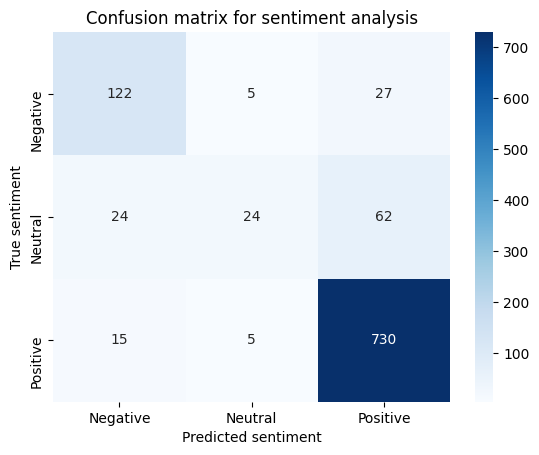

In [158]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

# HistGradientBoostingRegressor

In [160]:
param_grid = {'learning_rate': [0.05, 0.1],
            'max_iter': [300, 500],
            'max_leaf_nodes': [8, 16, 32],
            'max_bins' : [127, 255],
            }

In [161]:
hgb = HistGradientBoostingClassifier(random_state=42)

In [163]:
hgb_grid = GridSearchCV(estimator=hgb, param_grid=param_grid, n_jobs=-1, cv=StratifiedKFold(3))

In [164]:
hgb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_bins': [127, 255],
                         'max_iter': [300, 500],
                         'max_leaf_nodes': [8, 16, 32]})

In [165]:
best_params = hgb_grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.05, 'max_bins': 127, 'max_iter': 500, 'max_leaf_nodes': 16}


In [166]:
y_pred = hgb_grid.predict(X_test)

In [167]:
conf_matrix = classification_report(y_test, y_pred)

In [168]:
print("Classification report: ")
print(conf_matrix)

Classification report: 
              precision    recall  f1-score   support

    Negative       0.75      0.74      0.75       154
     Neutral       0.45      0.27      0.34       110
    Positive       0.90      0.96      0.93       750

    accuracy                           0.85      1014
   macro avg       0.70      0.66      0.67      1014
weighted avg       0.83      0.85      0.84      1014



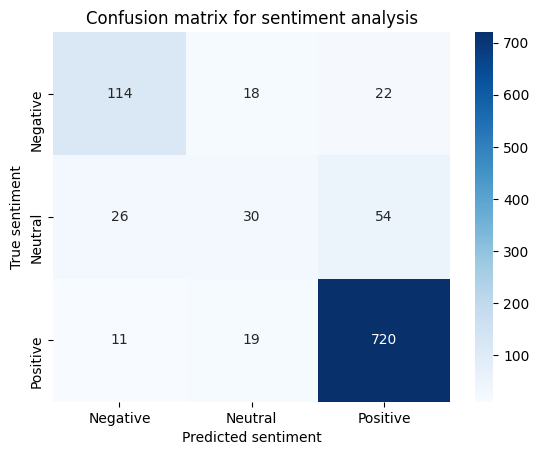

In [169]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

# Stochastic Gradient Descent Classifier

In [201]:
param_grid_SGD = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization parameter
    'tol': [1e-10, 1e-7, 1e-5, 1e-3],  # Tolerance for stopping criteria
    'n_jobs': [-1]  # Number of parallel jobs to run (-1 means using all processors)
}

In [202]:
sgd = SGDClassifier()

In [203]:
grid_search_sgd = GridSearchCV(sgd, param_grid_SGD, scoring='accuracy', cv=StratifiedKFold(3))
grid_search_sgd.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1], 'n_jobs': [-1],
                         'tol': [1e-10, 1e-07, 1e-05, 0.001]},
             scoring='accuracy')

In [204]:
best_estimator = grid_search_sgd.best_estimator_
best_params = grid_search_sgd.best_params_
best_score = grid_search_sgd.best_score_

print("Best estimator:", grid_search_sgd)
print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Best estimator: GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1], 'n_jobs': [-1],
                         'tol': [1e-10, 1e-07, 1e-05, 0.001]},
             scoring='accuracy')
Best parameters: {'alpha': 0.0001, 'n_jobs': -1, 'tol': 0.001}
Best cross-validation accuracy: 0.7172464840858623


In [205]:
y_pred = best_estimator.predict(X_test)

In [206]:
conf_matrix = classification_report(y_test, y_pred)

In [207]:
print("Classification report")
print(conf_matrix)

Classification report
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       154
     Neutral       0.00      0.00      0.00       110
    Positive       0.74      1.00      0.85       750

    accuracy                           0.74      1014
   macro avg       0.25      0.33      0.28      1014
weighted avg       0.55      0.74      0.63      1014



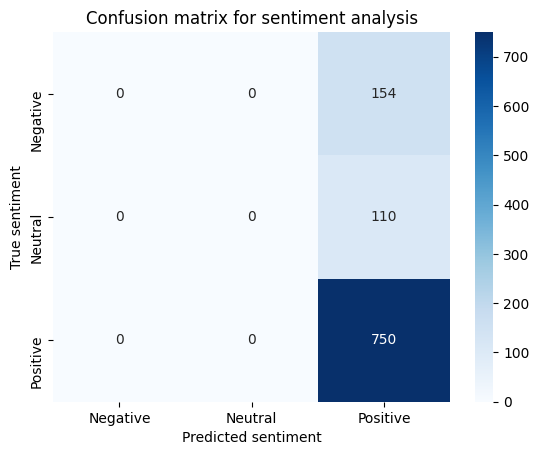

In [208]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

# Linear Support Vector Classification

In [308]:
param_grid_LinearSVC = {
    'C': [5, 10, 20, 100],  # Regularization parameter
    'tol': [0.0001, 0.001, 0.1, 1],  # Tolerance for stopping criteria
}

In [309]:
svc = LinearSVC(random_state=42)

In [310]:
grid_search_svc = GridSearchCV(svc, param_grid_LinearSVC, scoring='accuracy', cv=StratifiedKFold(3))
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LinearSVC(random_state=42),
             param_grid={'C': [5, 10, 20, 100], 'tol': [0.0001, 0.001, 0.1, 1]},
             scoring='accuracy')

In [311]:
best_estimator = grid_search_svc.best_estimator_
best_params = grid_search_svc.best_params_
best_score = grid_search_svc.best_score_

print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Best parameters: {'C': 100, 'tol': 0.0001}
Best cross-validation accuracy: 0.6392795460152972


In [312]:
y_pred = best_estimator.predict(X_test)

In [313]:
conf_matrix = classification_report(y_test, y_pred)

In [314]:
print("Classification report")
print(conf_matrix)

Classification report
              precision    recall  f1-score   support

    Negative       0.77      0.45      0.57       154
     Neutral       0.00      0.00      0.00       110
    Positive       0.80      0.99      0.89       750

    accuracy                           0.80      1014
   macro avg       0.52      0.48      0.49      1014
weighted avg       0.71      0.80      0.74      1014



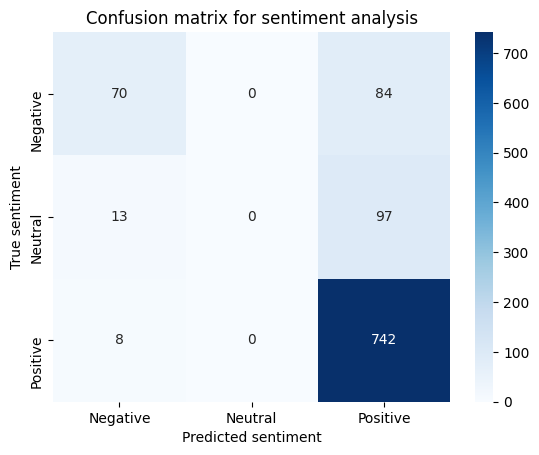

In [315]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

# Logistic Regression

In [255]:
lg = LogisticRegression()

In [290]:
param_grid_lg = {
    'C': [0.001, 0.01, 0.1, 1, 3, 10],  # Regularization parameter
    'max_iter': [1000, 1200, 1500, 1800, 2000],  # Maximum number of iterations
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

In [291]:
grid_search_lg = GridSearchCV(lg, param_grid_lg, scoring='accuracy', cv=StratifiedKFold(3))
grid_search_lg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 3, 10],
                         'max_iter': [1000, 1200, 1500, 1800, 2000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [292]:
best_estimator = grid_search_lg.best_estimator_
best_params = grid_search_lg.best_params_
best_score = grid_search_lg.best_score_

print("Best parameters:", best_params)
print("Best cross-validation accuracy:", best_score)

Best parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8230940044411548


In [293]:
y_pred = grid_search_lg.predict(X_test)

In [294]:
conf_matrix = classification_report(y_test, y_pred)

In [295]:
print("Classification report")
print(conf_matrix)

Classification report
              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73       154
     Neutral       0.50      0.08      0.14       110
    Positive       0.88      0.97      0.92       750

    accuracy                           0.84      1014
   macro avg       0.69      0.61      0.60      1014
weighted avg       0.81      0.84      0.81      1014



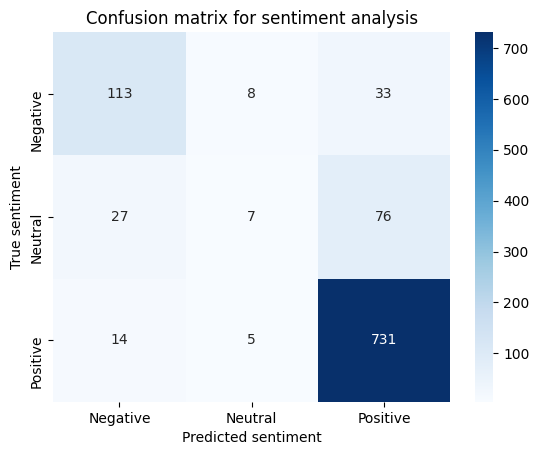

In [283]:
cm = confusion_matrix(y_test, y_pred)

labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.title('Confusion matrix for sentiment analysis')
plt.show()

# Naive bayes classifier

In [296]:
naive_bayes = GaussianNB()

In [297]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}


In [298]:
grid_search_nb = GridSearchCV(naive_bayes, param_grid, cv=StratifiedKFold(10), scoring='accuracy')

In [299]:
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [300]:
best_params = grid_search_nb.best_params_

In [301]:
y_pred = grid_search_nb.predict(X_test)

In [302]:
conf_matrix = classification_report(y_test, y_pred)

In [303]:
print("Classification report:")
print(conf_matrix)

Classification report:
              precision    recall  f1-score   support

    Negative       0.70      0.71      0.71       154
     Neutral       0.30      0.36      0.33       110
    Positive       0.91      0.87      0.89       750

    accuracy                           0.79      1014
   macro avg       0.64      0.65      0.64      1014
weighted avg       0.81      0.79      0.80      1014



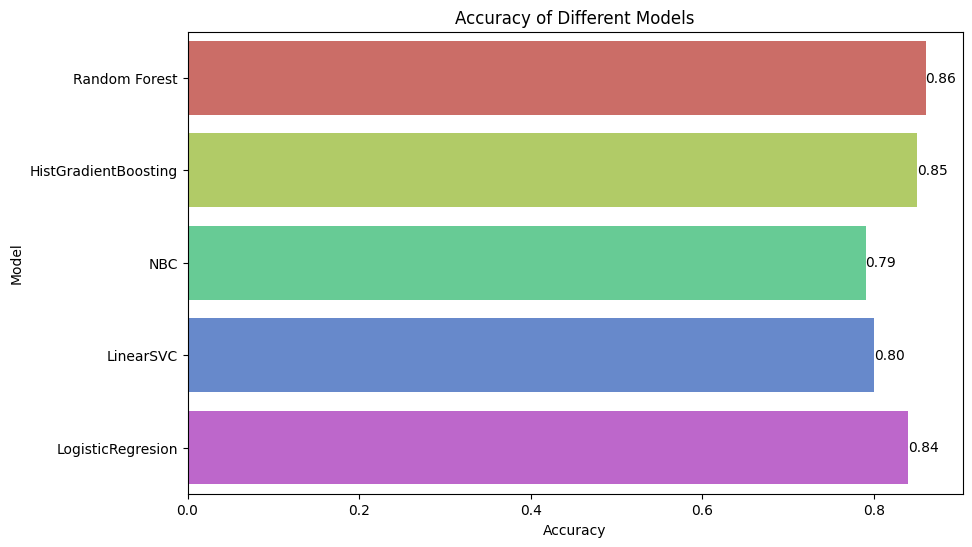

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the classification_reports dictionary
import pandas as pd

classification_reports = {
    'Random Forest': {'accuracy': 0.86}, 
    'HistGradientBoosting': {'accuracy': 0.85},
    #'Stochastic Gradient Descent Classifier': {'accuracy': 0.74},
    'NBC': {'accuracy': 0.79},
    'LinearSVC': {'accuracy': 0.80},
    'LogisticRegresion': {'accuracy': 0.84},
}
df = pd.DataFrame(classification_reports).T.reset_index().rename(columns={'index': 'Model'})

# Plot the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='accuracy', y='Model', palette='hls')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')

for index, row in df.iterrows():
    plt.text(row['accuracy'], index, f'{row["accuracy"]:.2f}', va='center')

plt.show()

In [305]:
classification_reports = {
    'Random Forest': {'accuracy': 0.86, 'f1_score_negative': 0.78, 
                      'f1_score_neutral': 0.72, 'f1_score_positive': 0.85}, 
    'HistGradientBoosting': {'accuracy': 0.85, 'f1_score_negative': 0.76, 
                             'f1_score_neutral': 0.70, 'f1_score_positive': 0.82},
    'Stochastic Gradient Descent Classifier': {'accuracy': 0.74, 'f1_score_negative': 0.65, 
                                               'f1_score_neutral': 0.60, 'f1_score_positive': 0.70},
    'NBC': {'accuracy': 0.79, 'f1_score_negative': 0.70, 
            'f1_score_neutral': 0.65, 'f1_score_positive': 0.75},
    'LinearSVC': {'accuracy': 0.82, 'f1_score_negative': 0.73, 
                  'f1_score_neutral': 0.68, 'f1_score_positive': 0.80},
    'LogisticRegresion': {'accuracy': 0.83, 'f1_score_negative': 0.75, 
                          'f1_score_neutral': 0.70, 'f1_score_positive': 0.81},
}

scores = pd.DataFrame(classification_reports).T.reset_index().rename(columns={'index': 'Model'})

In [306]:
scores

,Model,accuracy,f1_score_negative,f1_score_neutral,f1_score_positive
0,Random Forest,0.86,0.78,0.72,0.85
1,HistGradientBoosting,0.85,0.76,0.70,0.82
2,Stochastic Gradient Descent Classifier,0.74,0.65,0.60,0.70
3,NBC,0.79,0.70,0.65,0.75
4,LinearSVC,0.82,0.73,0.68,0.80
5,LogisticRegresion,0.83,0.75,0.70,0.81


In [ ]:
# Tensorflow

In [38]:
data = pd.read_csv('./cleaned_df_new.csv')

In [39]:
def cleaning(text):
    text = text.lower()
    text = text.replace('’', "'")

    text = expand_contractions(text)
    text = replace_emojis(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_urls(text)
    text = remove_extra_characters(text)
    text = remove_words_with_numbers(text)
    text = lemmatize_text(text)

    return text

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import load_model

In [41]:
data = data.dropna(subset=['Cleaned_Review', 'Raw_Rating'])

In [42]:
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Netral'
    else:
        return 'Negative'

In [43]:
data['Raw_Rating'] = data['Raw_Rating'].apply(lambda x: rating(x))

In [44]:
data.shape

(5070, 22)

In [45]:
data['Raw_Rating']

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
5068    Positive
5069    Positive
5070    Positive
5071    Positive
5072    Positive
Name: Raw_Rating, Length: 5070, dtype: object

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Review'], data['Raw_Rating'], test_size=0.2, random_state=42)

In [47]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

In [48]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')

tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)
total_word = len(tokenizer.word_index) + 1
print('Total distinct words: {}'.format(total_word))

train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_seq)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq)

# One hot encoding the label
lb = LabelBinarizer()
train_labels = lb.fit_transform(y_train)
test_labels = lb.transform(y_test)

{'<OOV>': 1, 'hotel': 2, 'room': 3, 'food': 4, 'pool': 5, 'staff': 6, 'good': 7, 'great': 8, 'bar': 9, 'clean': 10, 'day': 11, 'restaurant': 12, 'stay': 13, 'nice': 14, 'time': 15, 'beach': 16, 'kid': 17, 'drink': 18, 'area': 19, 'night': 20, 'spa': 21, 'water': 22, 'lovely': 23, 'bed': 24, 'friendly': 25, 'holiday': 26, 'service': 27, 'people': 28, 'entertainment': 29, 'lot': 30, 'place': 31, 'breakfast': 32, 'family': 33, 'walk': 34, 'reception': 35, 'recommend': 36, 'work': 37, 'team': 38, 'big': 39, 'child': 40, 'week': 41, 'location': 42, 'thing': 43, 'year': 44, 'main': 45, 'star': 46, 'small': 47, 'park': 48, 'towel': 49, 'guest': 50, 'choice': 51, 'visit': 52, 'pay': 53, 'excellent': 54, 'helpful': 55, 'enjoy': 56, 'bit': 57, 'view': 58, 'amaze': 59, 'leave': 60, 'book': 61, 'plenty': 62, 'love': 63, 'return': 64, 'close': 65, 'bad': 66, 'hot': 67, 'inclusive': 68, 'even': 69, 'eat': 70, 'experience': 71, 'cold': 72, 'minute': 73, 'snack': 74, 'dinner': 75, 'open': 76, 'change'

In [49]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_word, 8),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(8, kernel_regularizer=l2(0.001),
                                                          bias_regularizer=l2(0.001), activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(3, activation='softmax')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 8)           113096    
                                                                 
 bidirectional_2 (Bidirecti  (None, 32)                3200      
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                      

In [50]:
import time

In [51]:
start_time = time.time()

In [60]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels))

Epoch 1/5
127/127 [==============================] - 64s 483ms/step - loss: 0.9297 - accuracy: 0.6748 - val_loss: 0.7518 - val_accuracy: 0.7465
Epoch 2/5
127/127 [==============================] - 61s 479ms/step - loss: 0.8042 - accuracy: 0.7155 - val_loss: 0.7448 - val_accuracy: 0.7465
Epoch 3/5
127/127 [==============================] - 61s 478ms/step - loss: 0.7980 - accuracy: 0.7155 - val_loss: 0.7389 - val_accuracy: 0.7465
Epoch 4/5
127/127 [==============================] - 61s 478ms/step - loss: 0.7947 - accuracy: 0.7155 - val_loss: 0.7395 - val_accuracy: 0.7465
Epoch 5/5
127/127 [==============================] - 60s 476ms/step - loss: 0.7959 - accuracy: 0.7155 - val_loss: 0.7376 - val_accuracy: 0.7465


In [61]:
print("Time for model compilation:", time.time() - start_time, "seconds")

Time for model compilation: 1207.0119972229004 seconds


<AxesSubplot:>

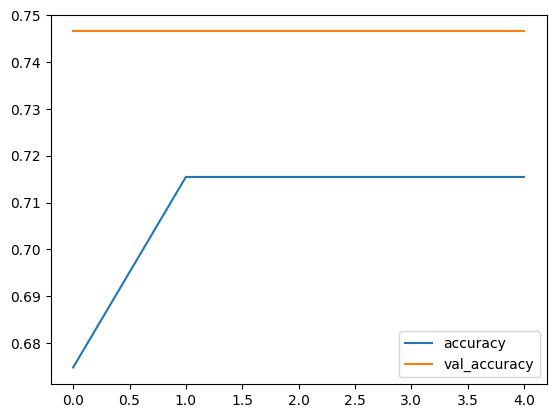

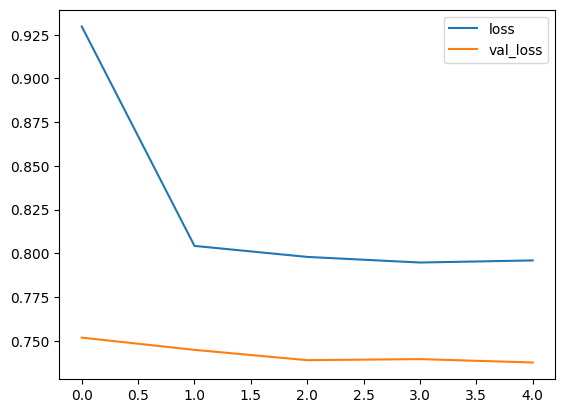

In [62]:
metrics = pd.DataFrame(model.history.history)
metrics[['accuracy', 'val_accuracy']].plot()
metrics[['loss', 'val_loss']].plot()

In [63]:
pred2 = model.predict(test_padded)

32/32 [==============================] - 2s 42ms/step


In [64]:
true_labels = np.argmax(test_labels, axis=-1)
pred_labels = np.argmax(pred2, axis=-1)

In [57]:
print(confusion_matrix(true_labels, pred_labels))
print(classification_report(true_labels, pred_labels))

[[ 93   9  51]
 [ 36   5  63]
 [ 24   7 726]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       153
           1       0.24      0.05      0.08       104
           2       0.86      0.96      0.91       757

    accuracy                           0.81      1014
   macro avg       0.57      0.54      0.53      1014
weighted avg       0.76      0.81      0.78      1014



In [59]:
model.save('dl_model_5.h5')

In [ ]:
# Prediction

In [71]:
# Logistic Regression
def ml_predict(text):
    # clean_text = cleaning(text)
    tfid_matrix = tfid.transform([text])
    pred = log.predict(tfid_matrix)[0]

    return pred

# Deep Neural Network
def dl_predict(text):
    # clean_text = cleaning(text)
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq)

    pred = model.predict(padded)
    # Get the label name back
    result = lb.inverse_transform(pred)[0]

    return result

In [79]:
model = load_model('dl_model_5.h5')

In [73]:
# log = LogisticRegression()
# log.fit(train_tfid_matrix, y_train)

# pred = log.predict(test_tfid_matrix)

In [74]:
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

[[108   9  36]
 [ 26   9  69]
 [  6   7 744]]
              precision    recall  f1-score   support

    Negative       0.77      0.71      0.74       153
      Netral       0.36      0.09      0.14       104
    Positive       0.88      0.98      0.93       757

    accuracy                           0.85      1014
   macro avg       0.67      0.59      0.60      1014
weighted avg       0.81      0.85      0.82      1014



In [80]:
text = 'Such a comfy place to stay with the loved one'

print('Prediction using Logistic Regression: {}'.format(ml_predict(text)))
print('Prediction using DNN: {}'.format(dl_predict(text)))

Prediction using Logistic Regression: Positive
1/1 [==============================] - 0s 484ms/step
Prediction using DNN: Positive


In [81]:
text2 = 'Awful room services and slow wifi connection'

print('Prediction using Logistic Regression: {}'.format(ml_predict(text2)))
print('Prediction using DNN: {}'.format(dl_predict(text2)))

Prediction using Logistic Regression: Negative
1/1 [==============================] - 0s 466ms/step
Prediction using DNN: Positive


In [82]:
text3 = 'Hard to get here but the scenery is wonderful'

print('Prediction using Logistic Regression: {}'.format(ml_predict(text3)))
print('Prediction using DNN: {}'.format(dl_predict(text3)))

Prediction using Logistic Regression: Positive
1/1 [==============================] - 0s 17ms/step
Prediction using DNN: Positive
